

# NILM Classification
The goal of this case study is to use various classification-based models to detect the Label in the NILM database whether the appliance is on or off

## Content

* [1. Problem Definition](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)    
    * [4.2.Feature Selection](#3.2) 
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Evaluate Models](#4.2) 
* [6. Model Tuning](#5)
    * [5.1. Model Tuning-Right Evaluation Metric](#5.1)
    * [5.2. Model Tuning-Balancing the sample](#5.2) 



<a id='0'></a>
# 1. Problem Definition

In the classification framework defined for NILM appliance detection is employed by creating a label for different houses in REDD database by choosing 1 or 0 if the appliance is on or off. For multi-channel appliances the string is joined together based on the number the number of channels. Say if the house has 15 different appliances then in the time domain if the appliance was <font color='red'> __ON__ </font> then the lable <font color='red'> __1__ </font> is generated repectively against this device. However, if the same is<font color='red'> __OFF__ </font> string <font color='red'> __0__ <font color='black'>is appending to the label. As an example if there are 6 channels at random time <font color='red'> __LABEL__ </font> for <font color='red'> __6 CHANNEL__ </font> appliances will look like this 
    <font color='red'> __LABEL:001010__ </font> if during that moment only two appliances were on at <font color='red'> __Channel 3 and Channel 5__ </font>

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
from pandas import read_csv, set_option
import winsound

from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV,StratifiedKFold
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from pickle import dump
from pickle import load

import tkinter as tk
from tkinter import filedialog
from time import perf_counter
import datetime as dt
from time import time

import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import matplotlib.pyplot as plt 

from tensorflow.keras.callbacks import ModelCheckpoint
import argparse

import keras
from keras import layers

<a id='1.2'></a>
## 2.2. Loading the Data

In [6]:
root = tk.Tk()
root.withdraw()

openfile_path = filedialog.askopenfilename()

# load dataset
cols = list(pd.read_csv(openfile_path,delimiter='\t', nrows =1))
print(cols)
print (len(cols))

start_cols = cols[1]
end_cols = cols[len(cols)-1]
col_list = [cols[1],cols[2], end_cols]
print(f"The start column name is : {start_cols} and end colunmn name is : {end_cols}\n")

dataset = read_csv(openfile_path, sep='\t',usecols=col_list, dtype={'Label': object})
print(dataset)

['Time', 'Power_mains_ch_1', 'Power_mains_ch_2', 'Power_oven_ch_3', 'Power_oven_ch_4', 'Power_refrigerator_ch_5', 'Power_dishwaser_ch_6', 'Power_kitchen_outlets_ch_7', 'Power_kitchen_outlets_ch_8', 'Power_lighting_ch_9', 'Power_washer_dryer_ch_10', 'Power_microwave_ch_11', 'Power_bathroom_gfi_ch_12', 'Power_electric_heat_ch_13', 'Power_stove_ch_14', 'Power_kitchen_outlets_ch_15', 'Power_kitchen_outlets_ch_16', 'Power_lighting_ch_17', 'Power_lighting_ch_18', 'Power_washer_dryer_ch_19', 'Power_washer_dryer_ch_20', 'Label']
22
The start column name is : Power_mains_ch_1 and end colunmn name is : Label

        Power_mains_ch_1  Power_mains_ch_2               Label
0                 222.20            118.83  000011100100001100
1                 223.17            119.19  000011100100001100
2                 223.60            118.92  000011100100001100
3                 222.91            119.16  000011100100001100
4                 222.94            118.83  000011100100001100
...            

In [7]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')
dataset.head()

,Power_mains_ch_1,Power_mains_ch_2,Label
0,222.20,118.83,000011100100001100
1,223.17,119.19,000011100100001100
2,223.60,118.92,000011100100001100
3,222.91,119.16,000011100100001100
4,222.94,118.83,000011100100001100


In [10]:
print (f"Total Classes are : {len(dataset['Label'].unique())}")
class_names = pd.read_csv('Labelling Strategy.txt',delimiter="\t", header=None, index_col=0, squeeze=True).to_dict()
set_option('display.max_rows', 500)
print(dataset.Label.value_counts().rename(index = class_names))
samples = int(input("Enter an integer for # of samples per class: ")) 

Total Classes are : 220
000011100100000000    127011
000011000100000000     74603
001011100100000000     38369
000011000100001100     31505
001011000100000000     24712
000011100100001100     24003
000011000100000100     13763
001011100100001100      8864
001011000100001100      8615
000011000100001000      6163
000011100100001000      4940
001011000100000100      4809
000111100100000000      4527
000111000100001100      3217
001011100100001000      3168
001011000100001000      2375
001111100100000000      1368
001111000100001100      1221
000011100100000100      1139
001111000100000000      1005
000111000100001000       959
000111000100000000       955
000011001110001100       895
000111100100001000       881
000011010100000000       682
000011101110001100       622
000011000100000101       598
000111100100001100       515
001111100100001000       502
001011001110001000       499
000011010100001100       495
000011000010001100       481
000011100100000001       465
001011001110001100 

Enter an integer for # of samples per class:  1000


In [11]:
Y= dataset["Label"]
Y_class_count = Y.value_counts().rename(index = class_names)

index = Y_class_count[Y_class_count <= samples].index
Y_filtered = dataset[dataset["Label"].isin(index)]
Y_f_t=np.transpose(Y_filtered)
reduced_dataset=dataset.drop(labels=Y_f_t)

print(reduced_dataset.Label.value_counts().rename(index = class_names))

000011100100000000    127011
000011000100000000     74603
001011100100000000     38369
000011000100001100     31505
001011000100000000     24712
000011100100001100     24003
000011000100000100     13763
001011100100001100      8864
001011000100001100      8615
000011000100001000      6163
000011100100001000      4940
001011000100000100      4809
000111100100000000      4527
000111000100001100      3217
001011100100001000      3168
001011000100001000      2375
001111100100000000      1368
001111000100001100      1221
000011100100000100      1139
001111000100000000      1005
Name: Label, dtype: int64


In [12]:
c_dfs = []  

for c in reduced_dataset["Label"].unique():  
    c_dfs.append(reduced_dataset[reduced_dataset["Label"] == c].sample(n=samples))

dataset_final = pd.concat(c_dfs)  

print(dataset_final.Label.value_counts().rename(index = class_names))

print(type(dataset_final))

print(dataset_final)

001011000100000000    1000
000011100100001000    1000
000011100100000100    1000
000011000100001100    1000
000011000100000000    1000
001111100100000000    1000
000011100100001100    1000
000011100100000000    1000
001011000100001100    1000
000111000100001100    1000
001011100100001100    1000
001111000100000000    1000
001011100100000000    1000
001011000100001000    1000
001111000100001100    1000
000111100100000000    1000
001011100100001000    1000
000011000100000100    1000
001011000100000100    1000
000011000100001000    1000
Name: Label, dtype: int64
<class 'pandas.core.frame.DataFrame'>
        Power_mains_ch_1  Power_mains_ch_2               Label
287509            204.46            181.79  000011100100001100
378992            211.35            126.90  000011100100001100
41360             185.65            218.46  000011100100001100
267802            200.11            190.34  000011100100001100
306476            215.14            175.17  000011100100001100
...               

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [13]:
dataset_final.shape
dataset_final['Power_Magnitude'] =np.sqrt((np.square(dataset_final['Power_mains_ch_1'])+np.square(dataset_final['Power_mains_ch_2'])))


In [14]:
set_option('display.width', 100)
print (f"Total Classes are : {len(dataset_final['Label'].unique())}")

Total Classes are : 20


In [15]:
# types
set_option('display.max_rows', 500)
dataset_final.dtypes

Power_mains_ch_1    float64
Power_mains_ch_2    float64
Label                object
Power_Magnitude     float64
dtype: object

In [16]:
# describe data
set_option('precision', 3)
dataset_final.describe()

,Power_mains_ch_1,Power_mains_ch_2,Power_Magnitude
count,20000.000,20000.000,20000.000
mean,209.936,275.008,389.711
std,106.708,368.695,339.336
min,52.770,37.610,65.665
25%,128.637,41.930,190.350
50%,227.690,119.160,277.718
75%,300.060,256.335,399.898
max,2943.430,3097.700,4273.117


Checking the population of the classes stored in the text file

In [17]:
class_names = pd.read_csv('Labelling Strategy.txt',delimiter="\t", header=None, index_col=0, squeeze=True).to_dict()
print(dataset_final.Label.value_counts().rename(index = class_names))

001011000100000000    1000
000011100100001000    1000
000011100100000100    1000
000011000100001100    1000
000011000100000000    1000
001111100100000000    1000
000011100100001100    1000
000011100100000000    1000
001011000100001100    1000
000111000100001100    1000
001011100100001100    1000
001111000100000000    1000
001011100100000000    1000
001011000100001000    1000
001111000100001100    1000
000111100100000000    1000
001011100100001000    1000
000011000100000100    1000
001011000100000100    1000
000011000100001000    1000
Name: Label, dtype: int64


The dataset is unbalanced with most of the electricity usage is on the lighther side

<a id='2.2'></a>
## 3.2. Data Visualization

<AxesSubplot:title={'center':'Correlation Matrix'}>

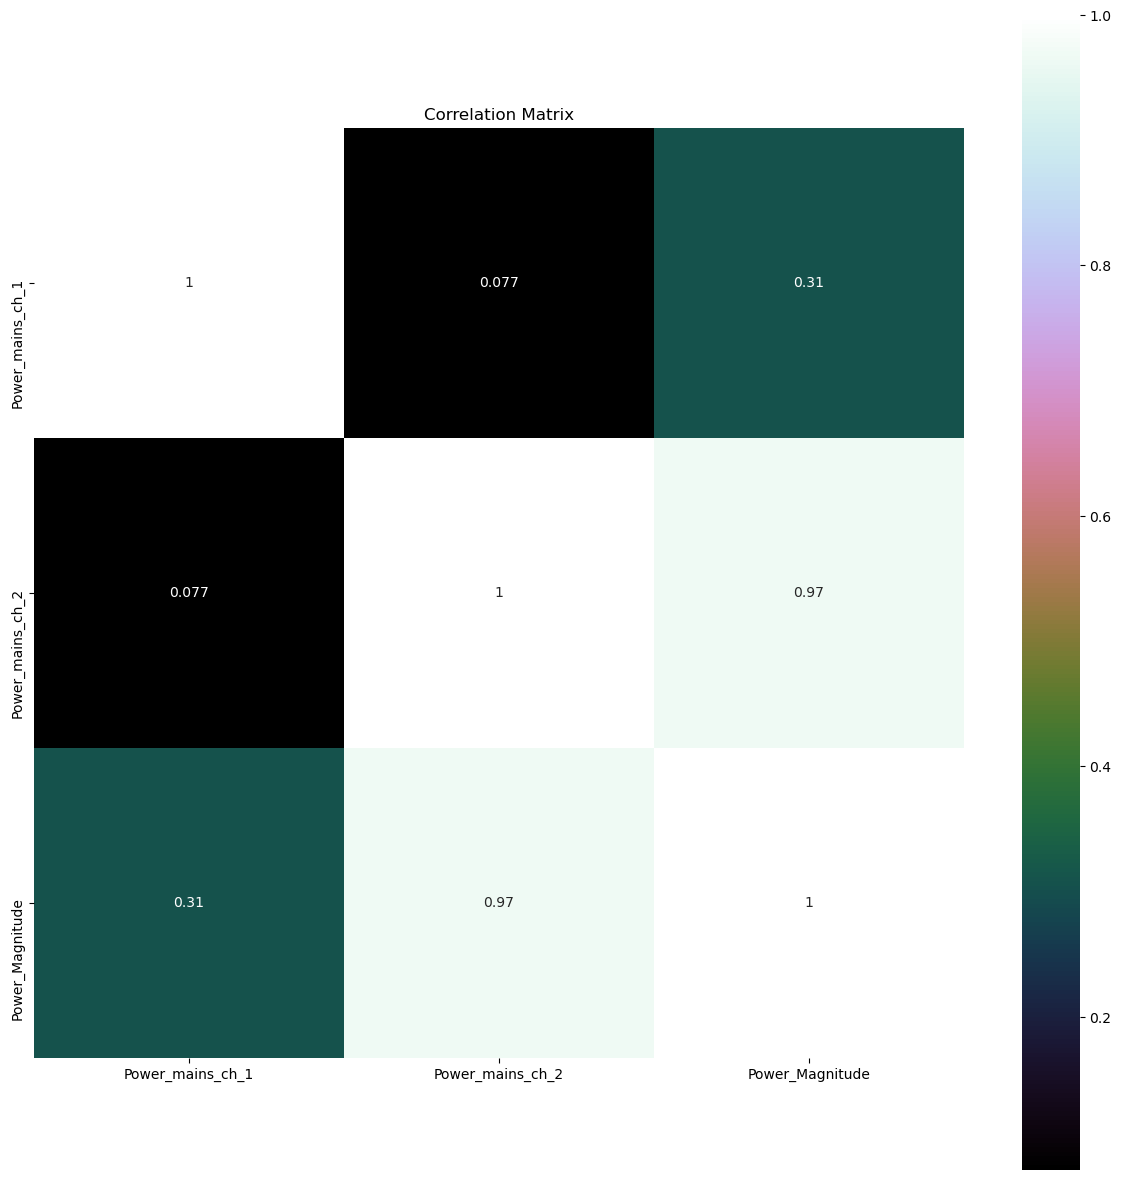

In [18]:
# correlation
correlation = dataset_final.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<a id='3'></a>
## 4. Data Preparation

In [19]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset_final.isnull().values.any())

Null Values = False


There is no null in the data, and the data is already in the float format, so there is no need to clean or categorise the data

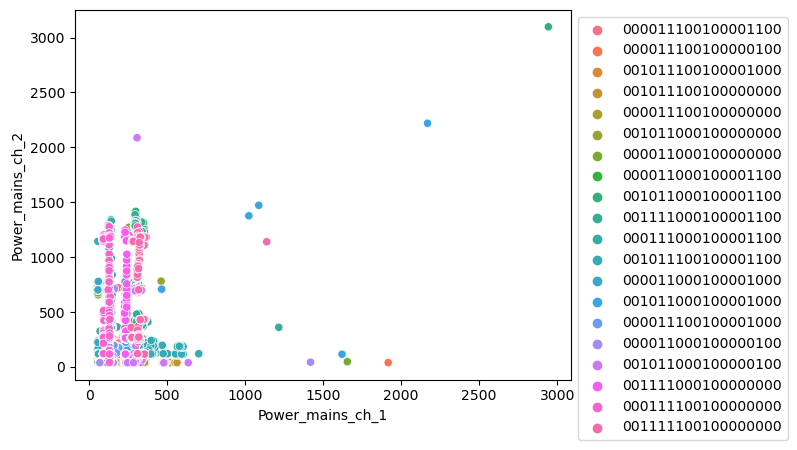

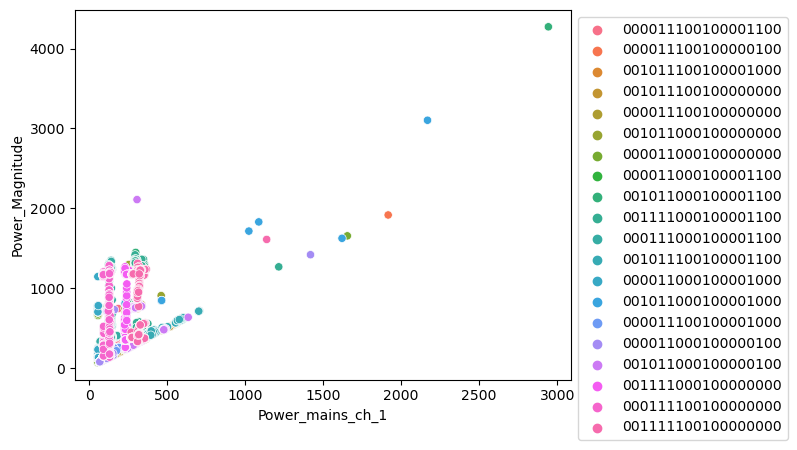

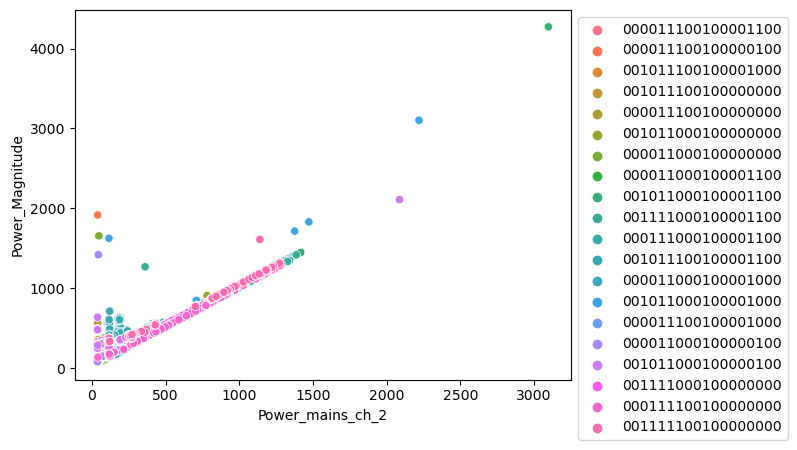

In [20]:
sns.scatterplot(x='Power_mains_ch_1', y='Power_mains_ch_2',
                hue='Label', data=dataset_final, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

sns.scatterplot(x='Power_mains_ch_1', y='Power_Magnitude',
                hue='Label', data=dataset_final, )
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

sns.scatterplot(x='Power_mains_ch_2', y='Power_Magnitude',
                hue='Label', data=dataset_final, )
plt.legend(bbox_to_anchor=(1, 1), loc=2) 
plt.show()


<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split and Evaluation Metrics

In [21]:
# split out validation dataset for the end
Y= dataset_final["Label"]
X = dataset_final.loc[:, dataset_final.columns != 'Label' ]

validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
trsuniqueT = Y_train.value_counts()
noOfClassesTrain = len(trsuniqueT)
print(noOfClassesTrain, " unique train classes:\n",trsuniqueT)
trsuniqueV = Y_validation.value_counts()
noOfClassesValidation = len(trsuniqueV)
print(noOfClassesValidation, " unique validation classes:\n", trsuniqueV)


20  unique train classes:
 000011100100000100    830
000011100100000000    825
001011000100000000    813
001011100100000000    813
001111000100001100    811
001111000100000000    811
000011000100001000    808
000011000100000000    806
000011100100001100    804
001011000100000100    801
000111100100000000    799
000011100100001000    797
000011000100001100    796
000011000100000100    794
001111100100000000    792
001011100100001000    790
001011000100001100    789
000111000100001100    785
001011100100001100    773
001011000100001000    763
Name: Label, dtype: int64
20  unique validation classes:
 001011000100001000    237
001011100100001100    227
000111000100001100    215
001011000100001100    211
001011100100001000    210
001111100100000000    208
000011000100000100    206
000011000100001100    204
000011100100001000    203
000111100100000000    201
001011000100000100    199
000011100100001100    196
000011000100000000    194
000011000100001000    192
001111000100000000    189
00111

In [22]:
# test options for classification
num_folds = 10
seed = 7
scoring='accuracy'

Enter an integer for # of epochs:  130



Labels:
 {'000011000100000000': 0, '000011000100000100': 1, '000011000100001000': 2, '000011000100001100': 3, '000011100100000000': 4, '000011100100000100': 5, '000011100100001000': 6, '000011100100001100': 7, '000111000100001100': 8, '000111100100000000': 9, '001011000100000000': 10, '001011000100000100': 11, '001011000100001000': 12, '001011000100001100': 13, '001011100100000000': 14, '001011100100001000': 15, '001011100100001100': 16, '001111000100000000': 17, '001111000100001100': 18, '001111100100000000': 19} 

 Epochs: 130 

Training started

Epoch 00001: val_accuracy improved from -inf to 0.27937, saving model to weights.best.hdf5

Epoch 00002: val_accuracy did not improve from 0.27937

Epoch 00003: val_accuracy improved from 0.27937 to 0.32188, saving model to weights.best.hdf5

Epoch 00004: val_accuracy improved from 0.32188 to 0.46062, saving model to weights.best.hdf5

Epoch 00005: val_accuracy did not improve from 0.46062

Epoch 00006: val_accuracy improved from 0.46062 to

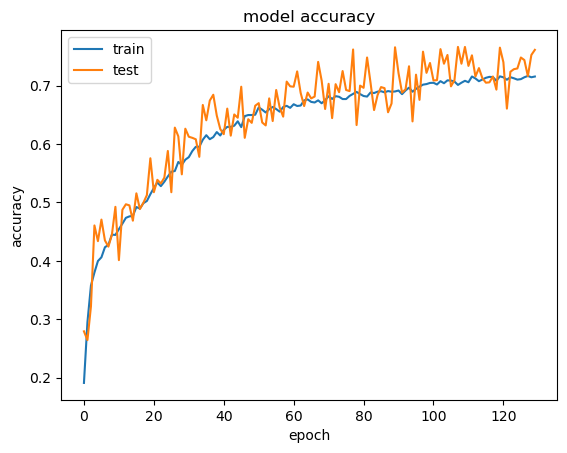

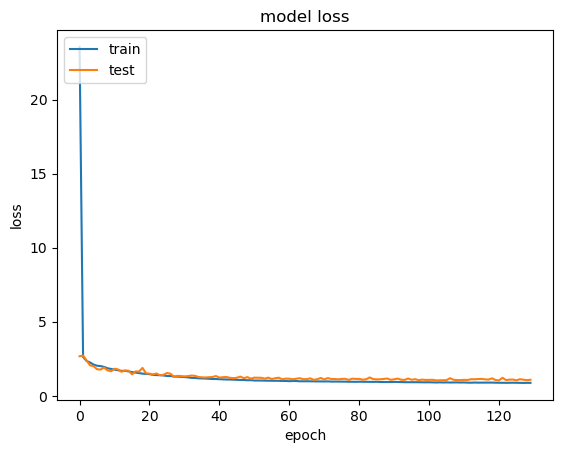

Created model and loaded weights from file
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       194
           1       0.83      0.76      0.79       206
           2       0.94      1.00      0.97       192
           3       0.79      0.57      0.66       204
           4       0.88      0.98      0.93       175
           5       0.88      0.94      0.91       170
           6       0.48      0.68      0.56       203
           7       0.51      0.56      0.53       196
           8       0.76      0.74      0.75       215
           9       0.71      0.62      0.66       201
          10       0.68      0.75      0.71       187
          11       0.50      0.52      0.51       199
          12       0.91      0.66      0.77       237
          13       0.64      0.25      0.36       211
          14       0.84      0.52      0.65       187
          15       0.51      0.98      0.67       210
          16       0.83      0.79     

In [23]:
# Start the stopwatch / counter
#t_start_all = perf_counter()
[rows,cols]=dataset_final.shape
full_message = ""
full_message="Filename :" + openfile_path + "\n"
full_message= full_message + f"Total Classes :  {len(dataset_final['Label'].unique())}  \n"
full_message = full_message + f"Total rows are : {rows} \t Total Columns are :{cols}\n\n"

savefile_path = filedialog.asksaveasfilename()  # Choosing a file to save results in
f = open(savefile_path, 'w');                   # Opening the file for saving result
f.write(full_message)

epochs = int(input("Enter an integer for # of epochs: "))   

encoder=LabelEncoder()

encoder.fit(Y_train)
encoded_Y_train=encoder.transform(Y_train)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)

encoder.fit(Y_validation)
encoded_Y_validation=encoder.transform(Y_validation)
dummy_y_validation = np_utils.to_categorical(encoded_Y_validation)

le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print(f"\nLabels:\n {le_name_mapping} \n\n Epochs: {epochs} \n")

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu')) 
#model.add(Dense(10, activation='relu'))
model.add(Dense(noOfClassesTrain, activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.001)
#opt = keras.optimizers.SGD(learning_rate=0.001) useless
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

print("Training started") 
t1_start = perf_counter()

history = model.fit(X_train,
                    dummy_y_train,
                    epochs=epochs,
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.1,
                    callbacks=callbacks_list,
                    verbose=0)
          
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(savefile_path + "ACC.png")
plt.show()     
    
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(savefile_path + "LOSS.png")
plt.show()  
 
model.load_weights("weights.best.hdf5")
# Compile model (required to make predictions)
#model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print("Created model and loaded weights from file")
    
preds = model.predict(X_validation) 
           
t1_stop = perf_counter()    
     
f.write(f"\nResults:\n  {classification_report(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1))}  \n")
f.write(f"\nCONFUSION MATRIX: \n{confusion_matrix(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1))}\n")
f.write(f"\nLabels:\n {le_name_mapping} \n\n Epochs: {epochs} \n")

print(classification_report(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1))) 
print(f"\nCONFUSION MATRIX: \n{confusion_matrix(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1))} \n")

precision_score_macro = precision_score(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1), average='macro')
recall_score_macro =  recall_score(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1), average='macro')
f1_score_macro = f1_score(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1), average='macro')
    
precision_score_micro = precision_score(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1), average='micro')
recall_score_micro =  recall_score(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1), average='micro')
f1_score_micro = f1_score(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1), average='micro')
    
full_message = f"Macro Precision: {precision_score_macro} \nMacro Recall: {recall_score_macro} \nMacro F1: {f1_score_macro} \n"  
full_message = full_message + f"\nMicro Precision: {precision_score_micro} \nMicro Recall:{recall_score_micro} \nMicro F1:{f1_score_micro} \n"

print(f"\n ***************************************\n{full_message}")
print(f"\nTime taken to finish: {round(t1_stop-t1_start,2)} secs") 

f.write(full_message)
    
f.close() 

winsound.Beep(500, 500)
   


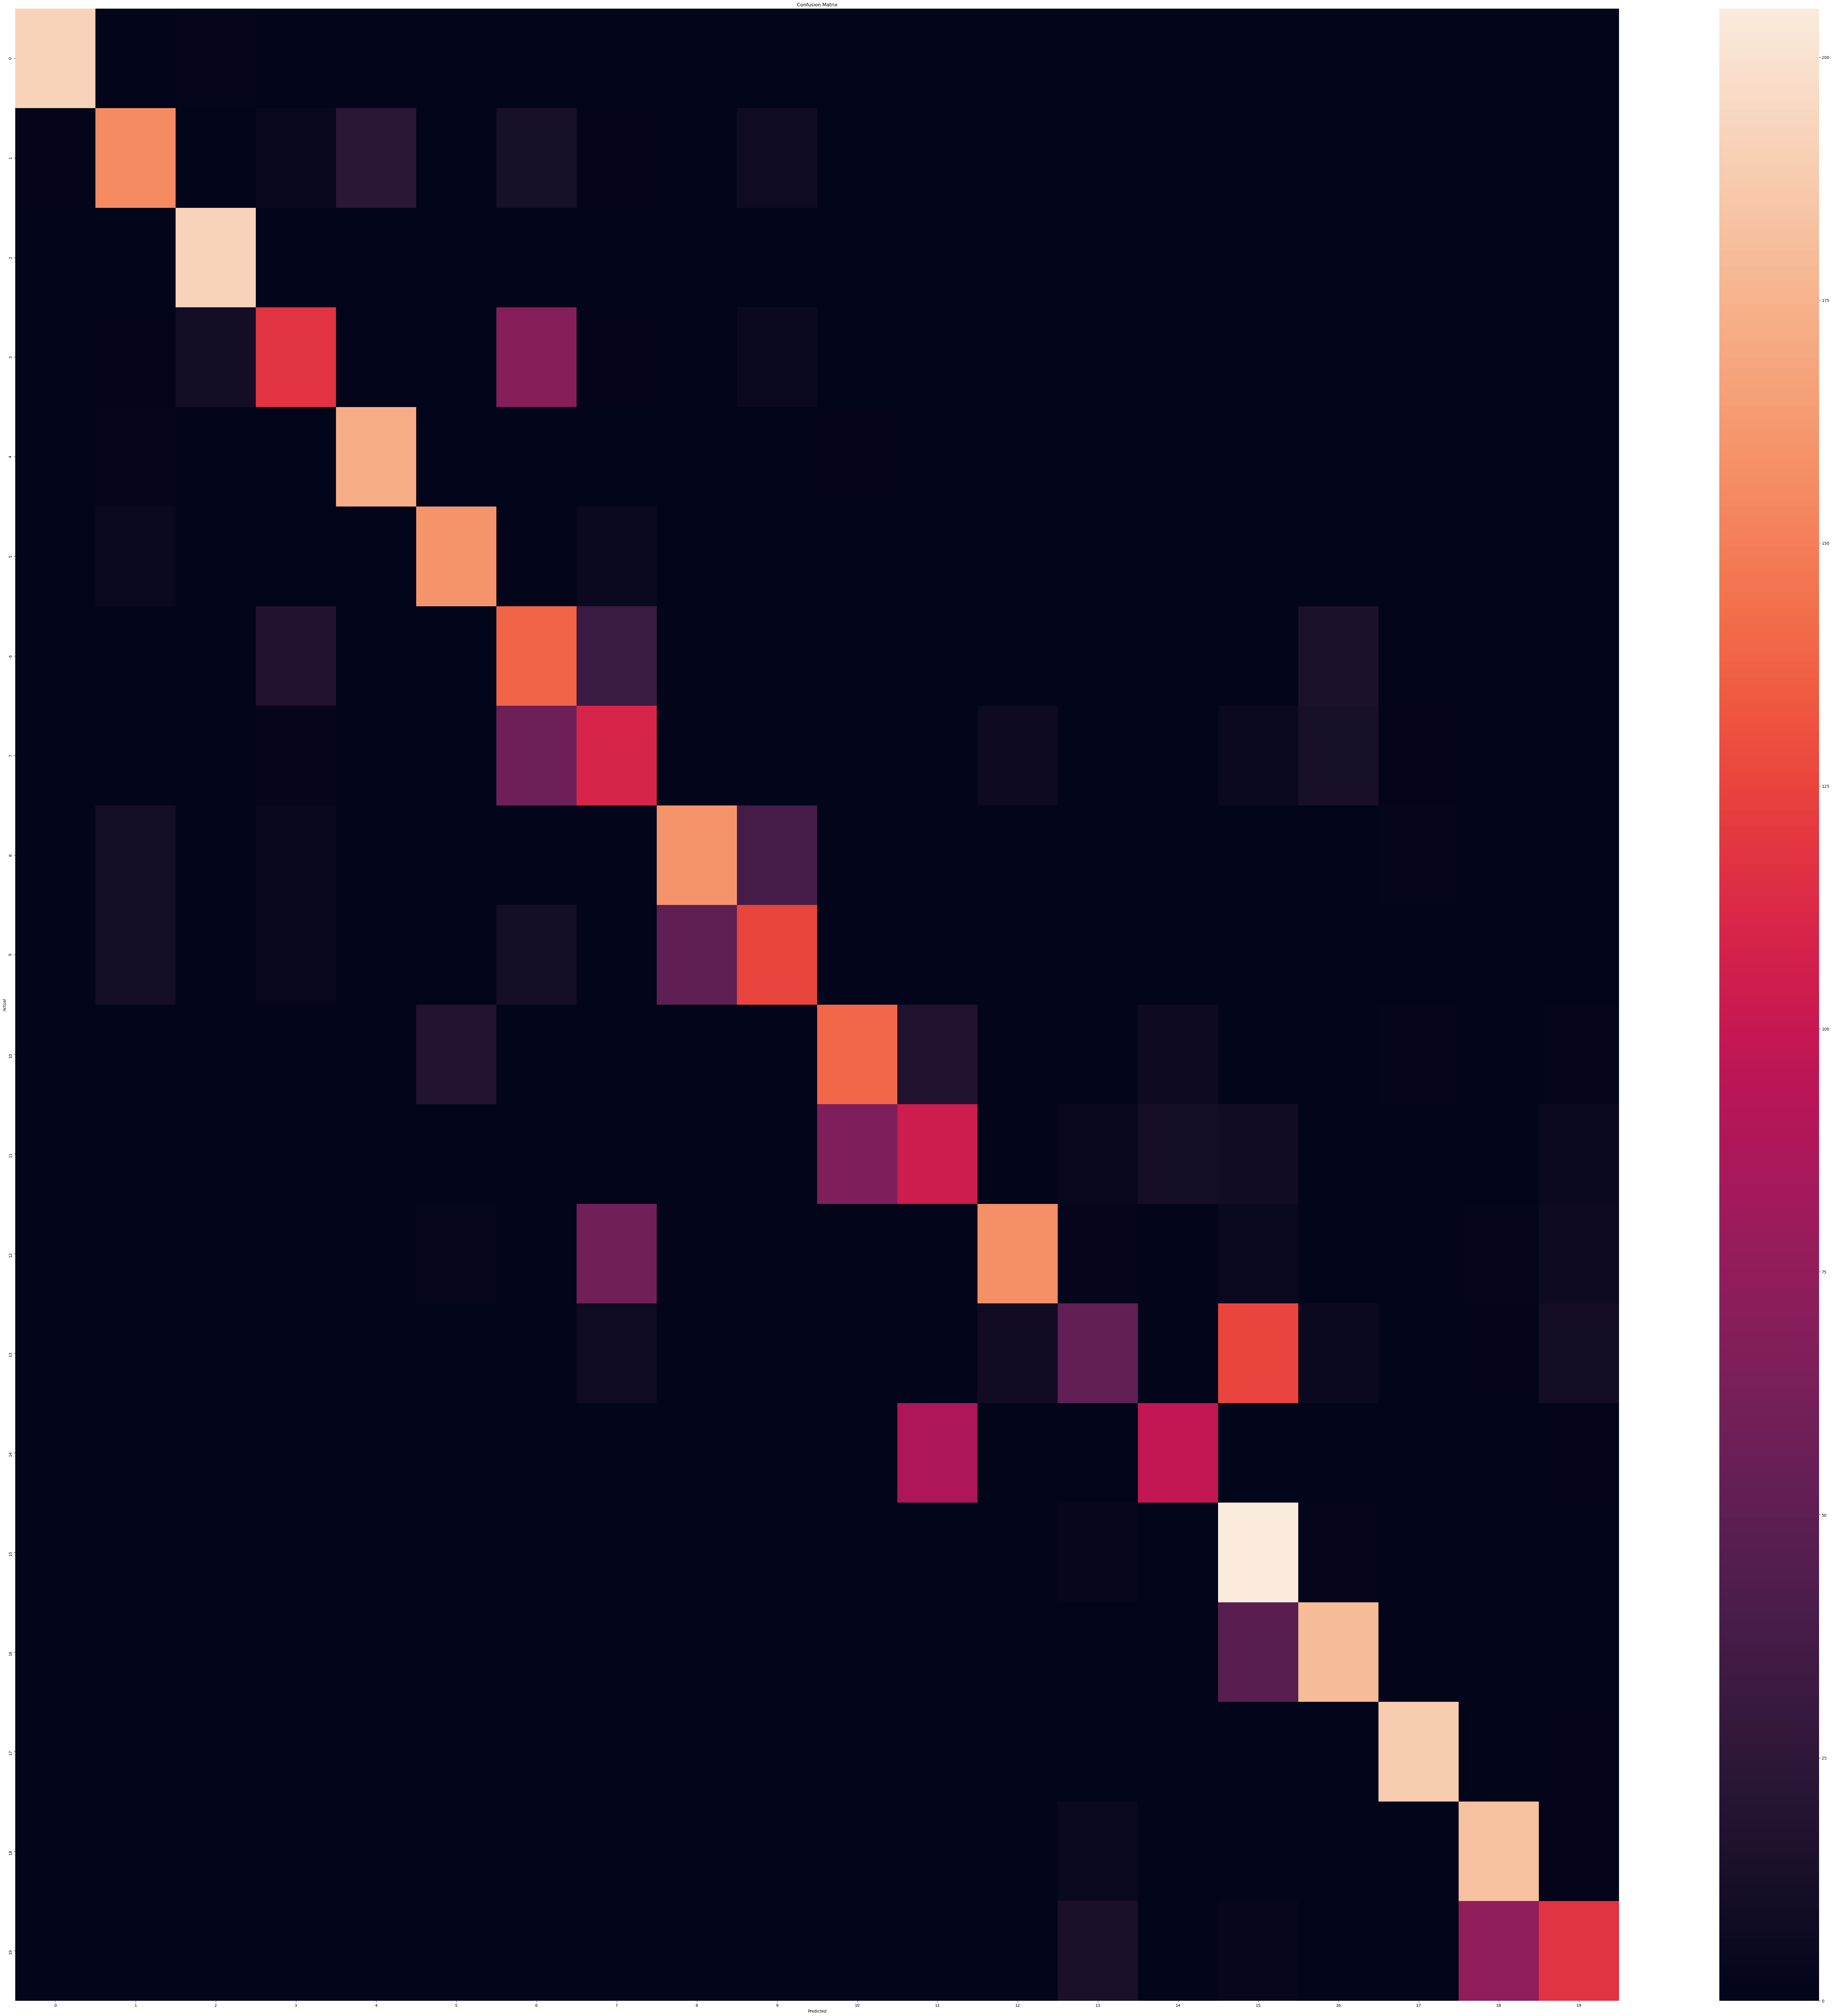

In [24]:
cm = confusion_matrix(dummy_y_validation.argmax(axis=1), preds.argmax(axis=1))
plt.figure(figsize=(90, 90))
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('cmL.png')
plt.show()

savefile_path = filedialog.asksaveasfilename()  # Choosing a file to save cm
f = open(savefile_path, 'w');                   
np.savetxt(f, cm, delimiter=',')
f.close()



The results on the test set are really good and the best algorithms were

1. KNN Classifier
2. Random Forest
3. Extra Trees

__Conclusion__:

Choosing the right metrics for KNN leads to the increase in accuracy. However, feature reduction cab further enhance the overall accuracy of the classification algorithm.

__Future Work__:
Future work will be done on reducing the features of the data and testing the algorithms for accuracy